# Implementing linear regression algorithm

## Quadratic linear regression

Importing the libraries

In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading the data

In [298]:
trainData = pd.read_csv('./train.csv')
trainData.drop(trainData[trainData['x'] > 100].index,inplace = True)
print(trainData)
trainData = trainData.values
testData = pd.read_csv('./test.csv')
testData = testData.values

        x          y
0    24.0  21.549452
1    50.0  47.464463
2    15.0  17.218656
3    38.0  36.586398
4    87.0  87.288984
..    ...        ...
695  58.0  58.595006
696  93.0  94.625094
697  82.0  88.603770
698  66.0  63.648685
699  97.0  94.975266

[699 rows x 2 columns]


Plotting the data using matplotlib

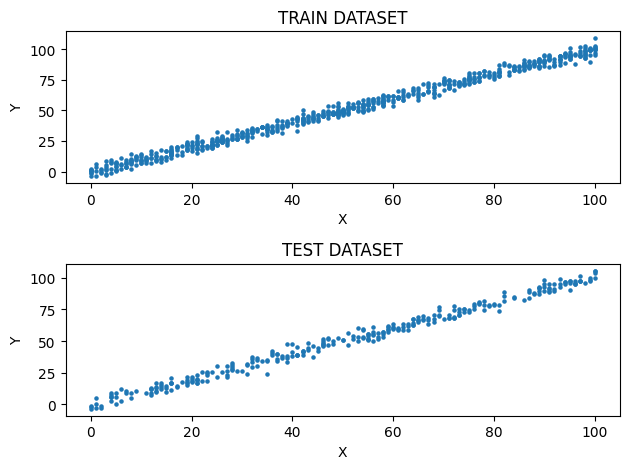

In [299]:
figure,axis = plt.subplots(2,1)
trainX = trainData[::,0]
trainY = trainData[::,1]
axis[0].set_title("TRAIN DATASET")
axis[0].scatter(trainX,trainY,s = 5)
axis[0].set_xlabel('X')
axis[0].set_ylabel('Y')
testX = testData[::,0]
testY = testData[::,1]
axis[1].set_title('TEST DATASET')
axis[1].scatter(testX,testY,s = 5)
axis[1].set_xlabel('X')
axis[1].set_ylabel('Y')
figure.tight_layout()
plt.show()
trainX = trainX.reshape(-1,1)
testX = testX.reshape(-1,1)


Implementing linear regression using inbuilt function

In [300]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

clf = LinearRegression()
clf.fit(trainX,trainY)
y_pred = clf.predict(testX)
print(r2_score(testY,y_pred))

0.9888014444327563


### Implementing my own gradient descent

Batch Gradient Descent

In [301]:
def batchGradientDescent(alpha,it,N):
    A = np.array([0,0]).reshape((1,2))
    X = np.concatenate((np.ones((N,1)),trainX),axis = 1)
    Y = trainY.reshape((N,1))
    Xt = np.transpose(X)
    Yt = np.transpose(Y)
    while (it > 0):
        A = A - (alpha/N)*(np.matmul(A,np.matmul(Xt,X))-np.matmul(Yt,X))
        Ypred = np.matmul(A,Xt)
        it = it - 1
    return A
thetaBatch = batchGradientDescent(0.0001,1000,699)

Incremental Gradient Descent

In [302]:
def incrementalGradientDescent(alpha,it,N):
    theta = np.zeros((2,1))
    while it > 0:
        for i in range(N):
            y = trainY[i]
            y = np.reshape(y,(1,1))
            x = trainX[i,::]
            x = np.reshape(x,(1,1))
            C = y - np.matmul(theta,np.transpose(x))
            x = np.concatenate((np.ones((1,1)),x),axis = 0)
            theta = theta + (alpha/N)*C*x
            it = it - 1
            if it == 0: break    
        if it == 0: break
    return np.transpose(theta)
thetaIncrement = incrementalGradientDescent(0.0001,100000,699)



Plotting the curve obtained by performing gradient descent above.

R2 Score of Batch Gradient Descent: 0.9887734053310671
R2 Score of Incremential Gradient Descent: 0.9888517297994651


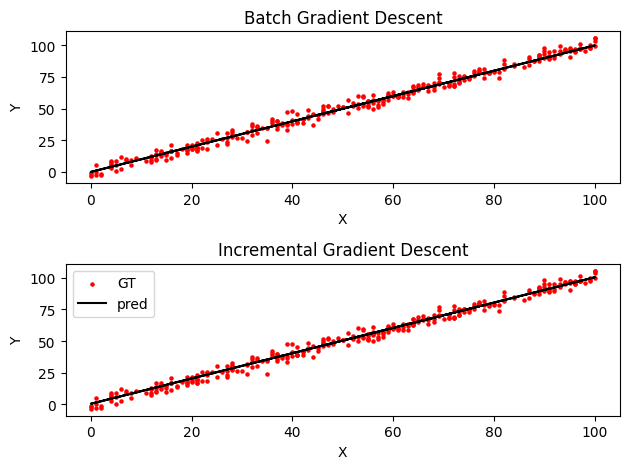

In [303]:
X = np.concatenate((np.ones((300,1)),testX),axis = 1)
predYBatch = np.matmul(X,np.transpose(thetaBatch))
predYIncrement = np.matmul(X,np.transpose(thetaIncrement))
realY = testY.reshape(300,1)
print('R2 Score of Batch Gradient Descent:',r2_score(realY,predYBatch))
print('R2 Score of Incremential Gradient Descent:',r2_score(realY,predYIncrement))
figure,axis = plt.subplots(2,1)
axis[0].set_title('Batch Gradient Descent')
axis[0].scatter(testX,testY,color = 'red',s = 5,label = 'GT')
axis[0].plot(testX,predYBatch,color = 'black',label = 'pred')
axis[0].set_xlabel('X')
axis[0].set_ylabel('Y')
axis[1].set_title('Incremental Gradient Descent')
axis[1].scatter(testX,testY,color = 'red',s = 5,label = 'GT')
axis[1].plot(testX,predYIncrement,color = 'black',label = 'pred')
axis[1].set_xlabel('X')
axis[1].set_ylabel('Y')
figure.tight_layout()
plt.legend()
plt.show()